In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from acquire import new_zillow_data, get_zillow_data

### 1. Acquire data from mySQL using the python module to connect and query. You will want to end with a single dataframe. Make sure to include: the logerror, all fields related to the properties that are available. You will end up using all the tables in the database.

- Be sure to do the correct join (inner, outer, etc.). We do not want to eliminate properties purely because they may have a null value for airconditioningtypeid.
- Only include properties with a transaction in 2017, and include only the last transaction for each properity (so no duplicate property ID's), along with zestimate error and date of transaction.
- Only include properties that include a latitude and longitude value.

In [2]:
df = new_zillow_data()
df.head()

,parcelid,typeconstructiontypeid,storytypeid,propertylandusetypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,id,basementsqft,...,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,14297519,NaN,NaN,261.0,NaN,NaN,NaN,NaN,1727539,NaN,...,6.059063e+13,0.025595,2017-01-01,None,None,None,None,Single Family Residential,None,None
1,17052889,NaN,NaN,261.0,NaN,NaN,NaN,NaN,1387261,NaN,...,6.111001e+13,0.055619,2017-01-01,None,None,None,None,Single Family Residential,None,None
2,14186244,NaN,NaN,261.0,NaN,NaN,NaN,NaN,11677,NaN,...,6.059022e+13,0.005383,2017-01-01,None,None,None,None,Single Family Residential,None,None
3,12177905,NaN,NaN,261.0,2.0,NaN,NaN,NaN,2288172,NaN,...,6.037300e+13,-0.103410,2017-01-01,None,None,None,Central,Single Family Residential,None,None
4,10887214,NaN,NaN,266.0,2.0,NaN,NaN,1.0,1970746,NaN,...,6.037124e+13,0.006940,2017-01-01,Central,None,None,Central,Condominium,None,None


### 2. Summarize your data (summary stats, info, dtypes, shape, distributions, value_counts, etc.)

In [3]:
df.shape

(77580, 68)

In [4]:
df.longitude.isnull().sum()

0

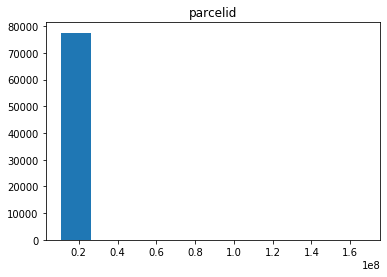

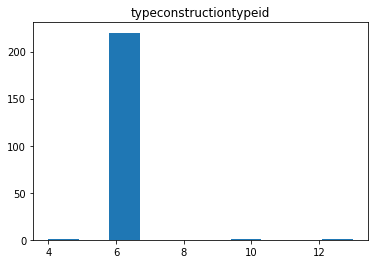

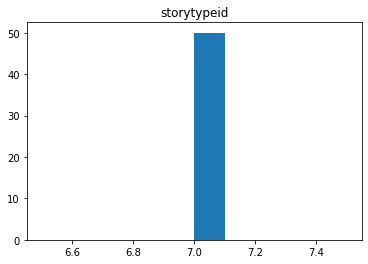

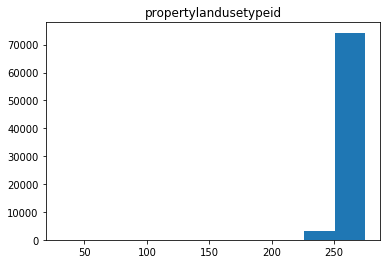

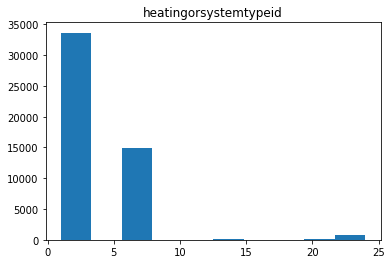

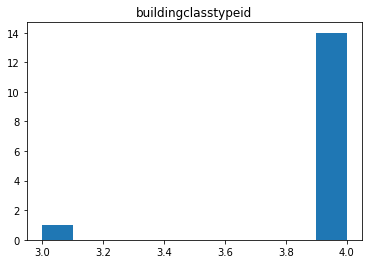

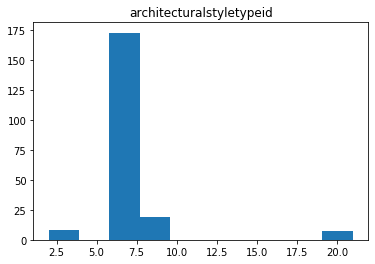

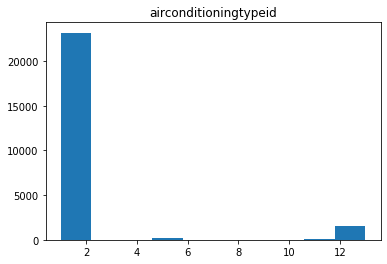

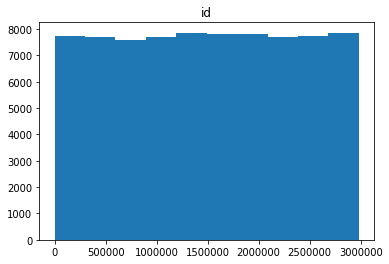

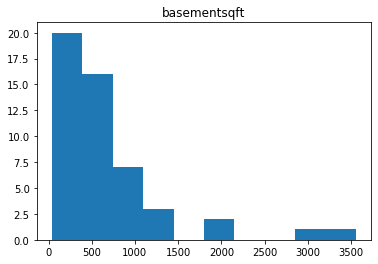

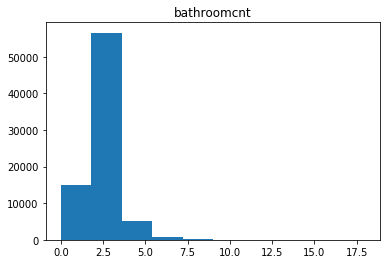

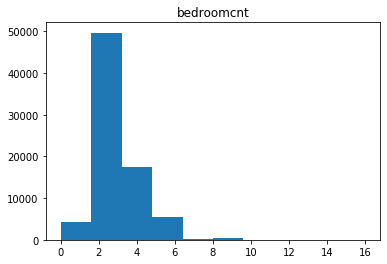

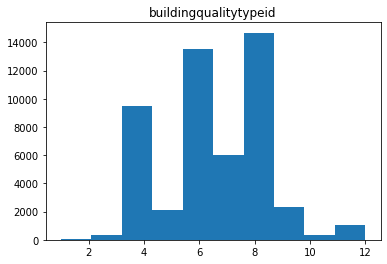

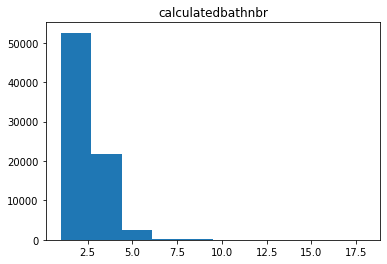

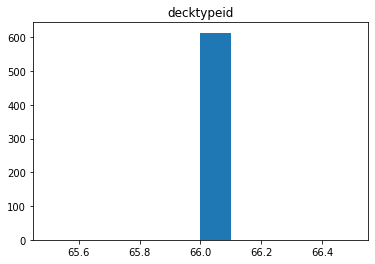

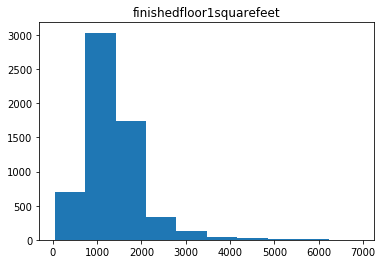

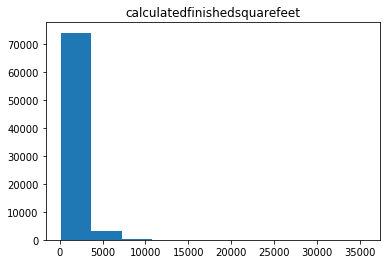

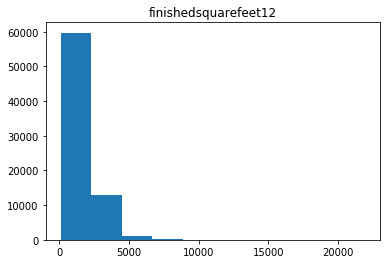

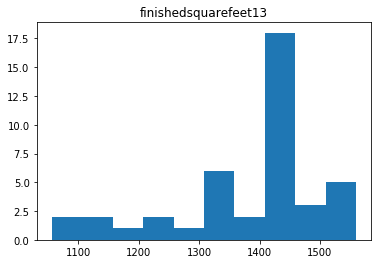

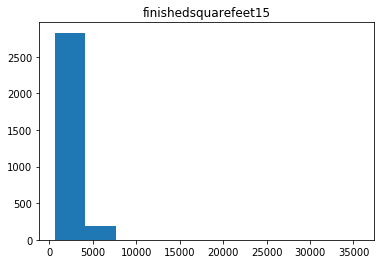

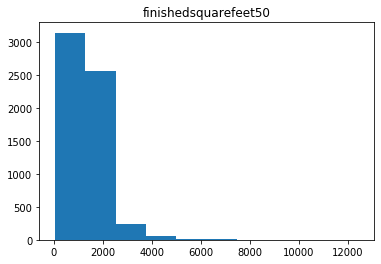

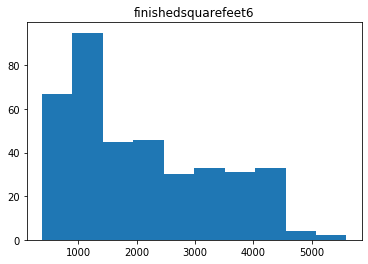

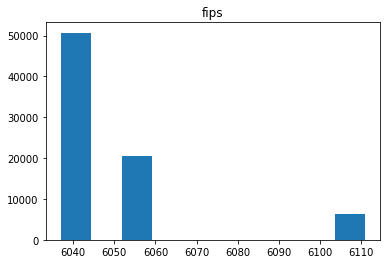

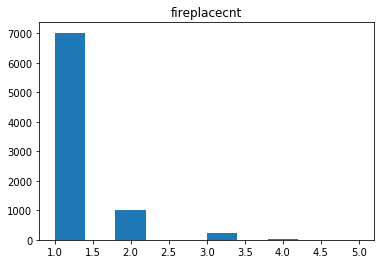

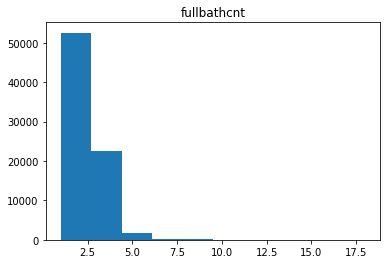

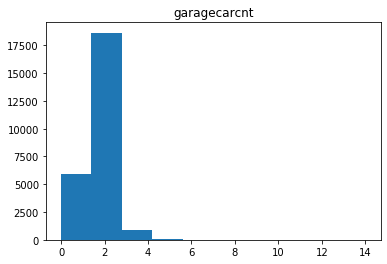

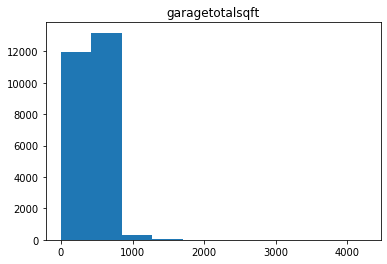

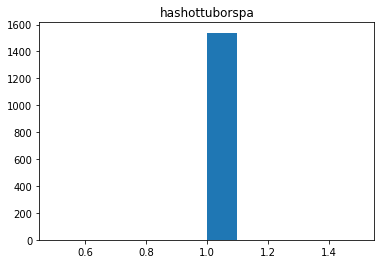

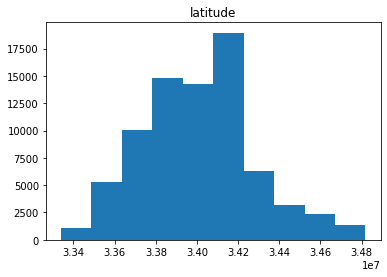

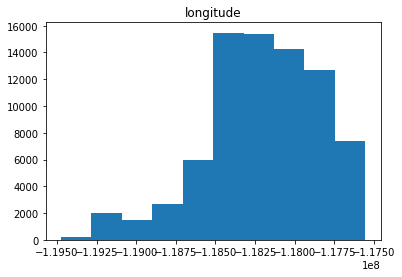

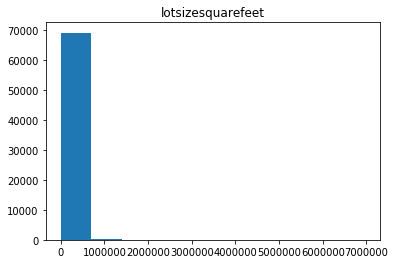

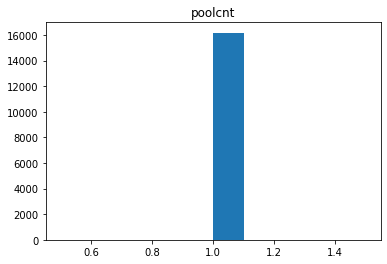

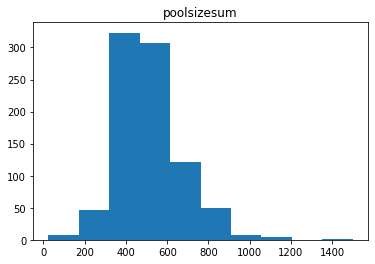

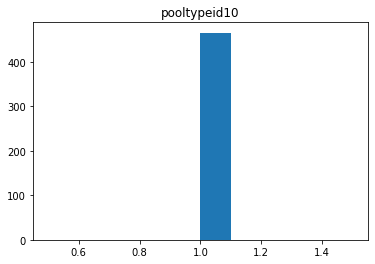

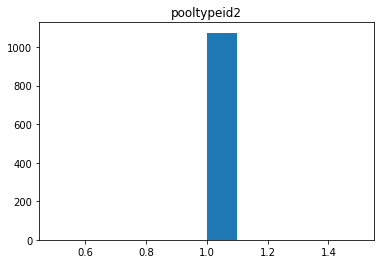

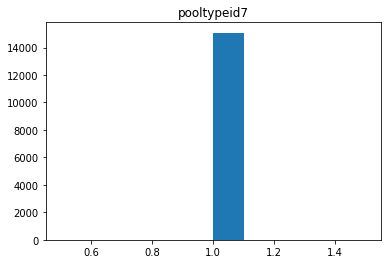

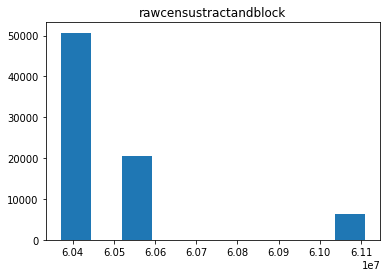

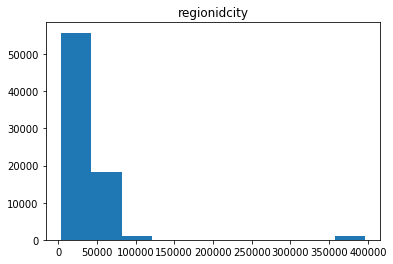

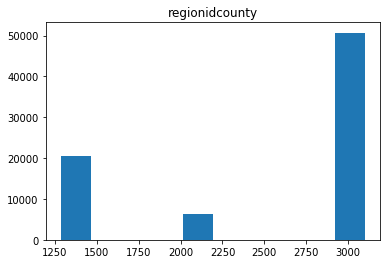

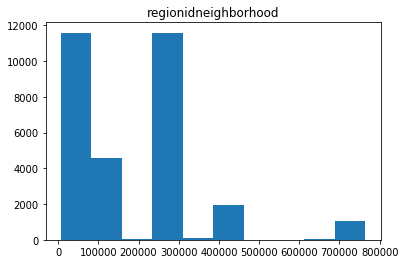

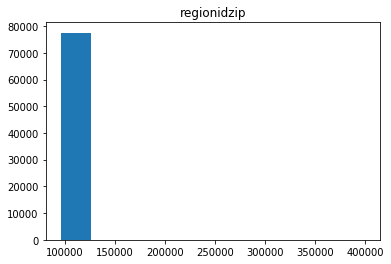

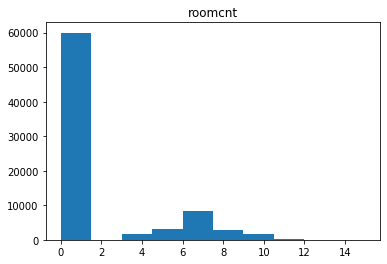

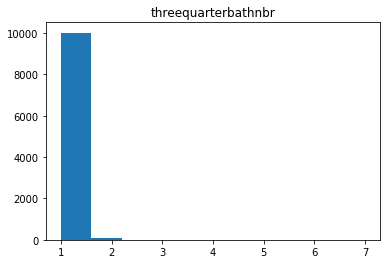

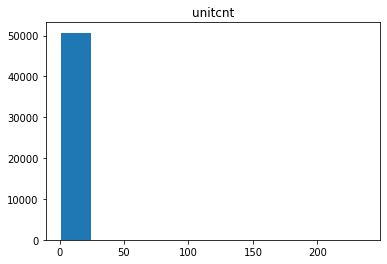

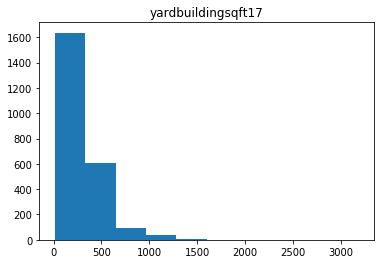

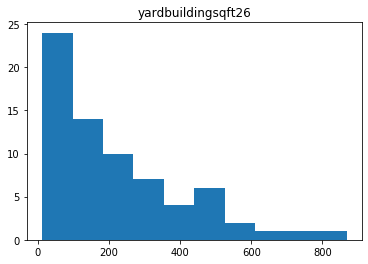

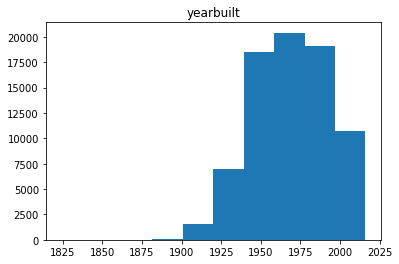

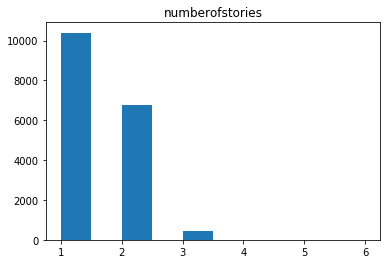

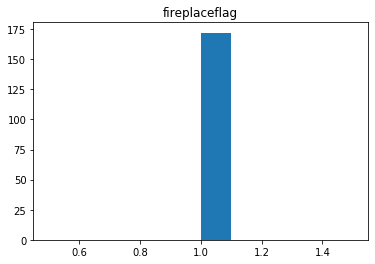

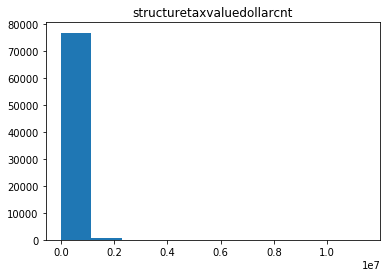

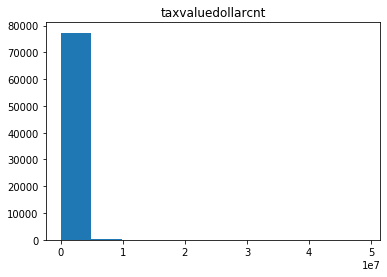

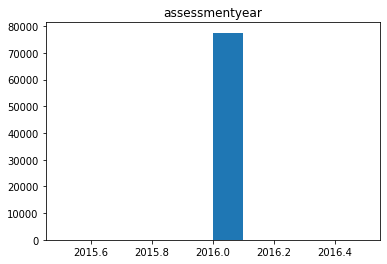

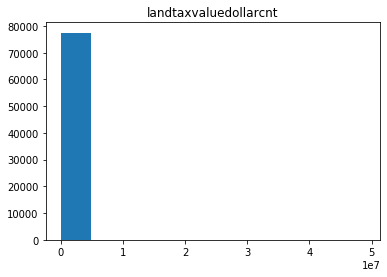

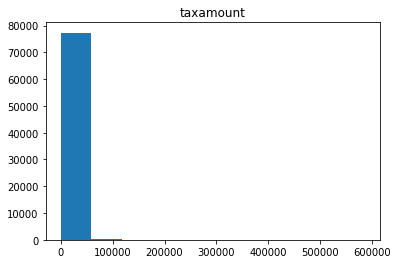

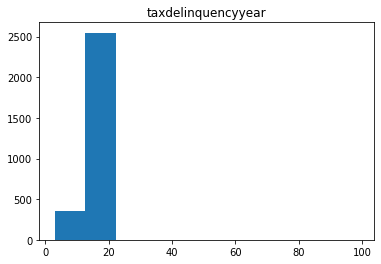

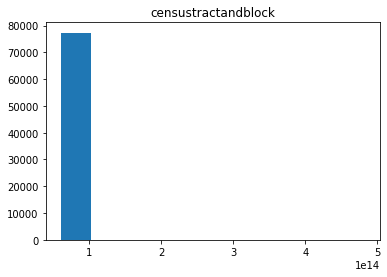

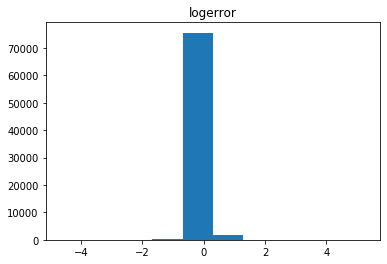

In [5]:
for col in df.columns:
    if df[col].dtype != object:
        plt.hist(df[col])
        plt.title(col)
        plt.show()

In [6]:
df.isna().sum()

parcelid                      0
typeconstructiontypeid    77357
storytypeid               77530
propertylandusetypeid         0
heatingorsystemtypeid     28008
                          ...  
buildingclassdesc         77565
heatingorsystemdesc       28008
propertylandusedesc           0
storydesc                 77530
typeconstructiondesc      77357
Length: 68, dtype: int64

In [7]:
df.isnull().sum()

parcelid                      0
typeconstructiontypeid    77357
storytypeid               77530
propertylandusetypeid         0
heatingorsystemtypeid     28008
                          ...  
buildingclassdesc         77565
heatingorsystemdesc       28008
propertylandusedesc           0
storydesc                 77530
typeconstructiondesc      77357
Length: 68, dtype: int64

In [8]:
df.describe()

,parcelid,typeconstructiontypeid,storytypeid,propertylandusetypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,id,basementsqft,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock,logerror
count,7.758000e+04,223.000000,50.0,77580.000000,49572.000000,15.000000,207.000000,25007.000000,7.758000e+04,50.000000,...,17599.000000,172.0,7.746500e+04,7.757900e+04,77580.0,7.757800e+04,77575.000000,2900.000000,7.733300e+04,77580.000000
mean,1.300828e+07,6.040359,7.0,261.824465,3.921811,3.933333,7.386473,1.812013,1.495404e+06,679.720000,...,1.434286,1.0,1.892796e+05,4.901476e+05,2016.0,3.011500e+05,5995.927626,14.088276,6.049667e+13,0.016800
std,3.519376e+06,0.556035,0.0,5.141564,3.594770,0.258199,2.728030,2.965768,8.609700e+05,689.703546,...,0.544515,0.0,2.304095e+05,6.537942e+05,0.0,4.927219e+05,7628.816490,2.181281,1.533329e+12,0.170739
min,1.071186e+07,4.000000,7.0,31.000000,1.000000,3.000000,2.000000,1.000000,3.490000e+02,38.000000,...,1.000000,1.0,4.400000e+01,1.000000e+03,2016.0,1.610000e+02,19.920000,3.000000,6.037101e+13,-4.655420
25%,1.153820e+07,6.000000,7.0,261.000000,2.000000,4.000000,7.000000,1.000000,7.521430e+05,273.000000,...,1.000000,1.0,8.417100e+04,2.068990e+05,2016.0,8.529325e+04,2712.650000,14.000000,6.037311e+13,-0.024310
50%,1.253056e+07,6.000000,7.0,261.000000,2.000000,4.000000,7.000000,1.000000,1.498256e+06,515.000000,...,1.000000,1.0,1.364020e+05,3.588780e+05,2016.0,2.031810e+05,4448.230000,15.000000,6.037603e+13,0.006675
75%,1.421135e+07,6.000000,7.0,266.000000,7.000000,4.000000,7.000000,1.000000,2.240950e+06,796.500000,...,2.000000,1.0,2.187340e+05,5.690000e+05,2016.0,3.667398e+05,6926.885000,15.000000,6.059042e+13,0.039291
max,1.676893e+08,13.000000,7.0,275.000000,24.000000,4.000000,21.000000,13.000000,2.982274e+06,3560.000000,...,6.000000,1.0,1.142179e+07,4.906124e+07,2016.0,4.895220e+07,586639.300000,99.000000,4.830301e+14,5.262999


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77580 entries, 0 to 77579
Data columns (total 68 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      77580 non-null  int64  
 1   typeconstructiontypeid        223 non-null    float64
 2   storytypeid                   50 non-null     float64
 3   propertylandusetypeid         77580 non-null  float64
 4   heatingorsystemtypeid         49572 non-null  float64
 5   buildingclasstypeid           15 non-null     float64
 6   architecturalstyletypeid      207 non-null    float64
 7   airconditioningtypeid         25007 non-null  float64
 8   id                            77580 non-null  int64  
 9   basementsqft                  50 non-null     float64
 10  bathroomcnt                   77580 non-null  float64
 11  bedroomcnt                    77580 non-null  float64
 12  buildingqualitytypeid         49810 non-null  float64
 13  c

### 3. Write a function that takes in a dataframe of observations and attributes and returns a dataframe where each row is an atttribute name, the first column is the number of rows with missing values for that attribute, and the second column is percent of total rows that have missing values for that attribute. Run the function and document takeaways from this on how you want to handle missing values.

In [10]:
missing_row_value = df.isnull().sum()
missing_row_value

parcelid                      0
typeconstructiontypeid    77357
storytypeid               77530
propertylandusetypeid         0
heatingorsystemtypeid     28008
                          ...  
buildingclassdesc         77565
heatingorsystemdesc       28008
propertylandusedesc           0
storydesc                 77530
typeconstructiondesc      77357
Length: 68, dtype: int64

In [11]:
percent_row_missing = round(df.isnull().sum()/len(df),2)*100
percent_row_missing

parcelid                    0.0
typeconstructiontypeid    100.0
storytypeid               100.0
propertylandusetypeid       0.0
heatingorsystemtypeid      36.0
                          ...  
buildingclassdesc         100.0
heatingorsystemdesc        36.0
propertylandusedesc         0.0
storydesc                 100.0
typeconstructiondesc      100.0
Length: 68, dtype: float64

In [12]:
def missing_values(df):
    # Gives value counts of missing rows
    missing_row_value = df.isnull().sum()
    # Gives the percentage of rows missing
    percent_row_missing = round(df.isnull().sum()/len(df),2)*100
    # Creates a new df for the missing rows and percent missing
    missing_df = pd.DataFrame({'missing_rows' : missing_row_value, 'percent_missing' : percent_row_missing})
    return missing_df
missing_values(df)

,missing_rows,percent_missing
parcelid,0,0.0
typeconstructiontypeid,77357,100.0
storytypeid,77530,100.0
propertylandusetypeid,0,0.0
heatingorsystemtypeid,28008,36.0
...,...,...
buildingclassdesc,77565,100.0
heatingorsystemdesc,28008,36.0
propertylandusedesc,0,0.0
storydesc,77530,100.0


In [13]:
missing_values(df).head(30)

,missing_rows,percent_missing
parcelid,0,0.0
typeconstructiontypeid,77357,100.0
storytypeid,77530,100.0
propertylandusetypeid,0,0.0
heatingorsystemtypeid,28008,36.0
buildingclasstypeid,77565,100.0
architecturalstyletypeid,77373,100.0
airconditioningtypeid,52573,68.0
id,0,0.0
basementsqft,77530,100.0


In [14]:
missing_values(df).tail(30)

,missing_rows,percent_missing
rawcensustractandblock,0,0.0
regionidcity,1472,2.0
regionidcounty,0,0.0
regionidneighborhood,46606,60.0
regionidzip,50,0.0
roomcnt,0,0.0
threequarterbathnbr,67474,87.0
unitcnt,26876,35.0
yardbuildingsqft17,75187,97.0
yardbuildingsqft26,77510,100.0


There are a lot of rows missing data. Going to set a threshold if more than 5% is missing, to drop.

### 4.Write a function that takes in a dataframe and returns a dataframe with 3 columns: the number of columns missing, percent of columns missing, and number of rows with n columns missing. Run the function and document takeaways from this on how you want to handle missing values.

In [15]:
# df.loc[ : ].count() means we're looking at every row to count the number of null values in each row 
# .isna() shows if there are booleans if there is nulls. .any() looks for true values from the isna()
# summing the count of trues with .count()
missing_cols = df.loc[:, df.isna().any()].count()
missing_cols

typeconstructiontypeid            223
storytypeid                        50
heatingorsystemtypeid           49572
buildingclasstypeid                15
architecturalstyletypeid          207
airconditioningtypeid           25007
basementsqft                       50
buildingqualitytypeid           49810
calculatedbathnbr               76964
decktypeid                        614
finishedfloor1squarefeet         6037
calculatedfinishedsquarefeet    77379
finishedsquarefeet12            73924
finishedsquarefeet13               42
finishedsquarefeet15             3027
finishedsquarefeet50             6037
finishedsquarefeet6               386
fireplacecnt                     8289
fullbathcnt                     76964
garagecarcnt                    25520
garagetotalsqft                 25520
hashottuborspa                   1539
lotsizesquarefeet               69322
poolcnt                         16174
poolsizesum                       869
pooltypeid10                      465
pooltypeid2 

In [16]:
len(df.index)

77580

In [17]:
# len(df.index) shows the number of rows
percent_cols_missing = round(missing_cols/ len(df.index) *100 ,2)
percent_cols_missing

typeconstructiontypeid            0.29
storytypeid                       0.06
heatingorsystemtypeid            63.90
buildingclasstypeid               0.02
architecturalstyletypeid          0.27
airconditioningtypeid            32.23
basementsqft                      0.06
buildingqualitytypeid            64.20
calculatedbathnbr                99.21
decktypeid                        0.79
finishedfloor1squarefeet          7.78
calculatedfinishedsquarefeet     99.74
finishedsquarefeet12             95.29
finishedsquarefeet13              0.05
finishedsquarefeet15              3.90
finishedsquarefeet50              7.78
finishedsquarefeet6               0.50
fireplacecnt                     10.68
fullbathcnt                      99.21
garagecarcnt                     32.90
garagetotalsqft                  32.90
hashottuborspa                    1.98
lotsizesquarefeet                89.36
poolcnt                          20.85
poolsizesum                       1.12
pooltypeid10             

In [29]:
def missing_cols(df):
    # df.loc[ : ].count() means we're looking at every row to count the number of null values in each row 
    # .isna() shows if there are booleans if there is nulls. .any() looks for true values from the isna()
    # summing the count of trues with .count()
    missing_cols = df.loc[:, df.isna().any()].count()
    # len(df.index) shows the number of rows
    percent_cols_missing = round(df.loc[:, df.isna().any()].count()/ len(df.index) *100 ,2)
    missing_cols_df = pd.DataFrame({'missing_columns' : missing_cols, 'percent_columns_missing' : percent_cols_missing})
    return missing_cols_df
missing_cols(df)

,missing_columns,percent_columns_missing
heatingorsystemtypeid,49572,64.06
buildingqualitytypeid,49809,64.37
calculatedbathnbr,76960,99.46
calculatedfinishedsquarefeet,77364,99.98
finishedsquarefeet12,73920,95.53
fullbathcnt,76960,99.46
lotsizesquarefeet,69202,89.43
propertyzoningdesc,50415,65.15
regionidcity,75923,98.12
regionidzip,77337,99.95


Same observation on columns. Going to get rid of data that has over 5% missing

# Prepare

### 1. Remove any properties that are likely to be something other than single unit properties. (e.g. no duplexes, no land/lot, ...). There are multiple ways to estimate that a property is a single unit, and there is not a single "right" answer. But for this exercise, do not purely filter by unitcnt as we did previously. Add some new logic that will reduce the number of properties that are falsely removed. You might want to use # bedrooms, square feet, unit type or the like to then identify those with unitcnt not defined.

In [19]:
df.propertylandusetypeid.value_counts()

261.0    52442
266.0    19342
246.0     2021
269.0     1947
248.0      729
247.0      539
265.0      335
263.0       74
275.0       59
260.0       42
267.0       29
31.0        15
264.0        6
Name: propertylandusetypeid, dtype: int64

### Properties that fit the single unit criteria
propertylandusetypeid

- 261 Single Family Residential
- 263 Mobile Home
- 264 Townhouse
- 266 Condominium
- 273 Bungalow
- 276 Patio Home
- 275 Manufactured, Modular, Prefabricated Homes
- 279 Inferred Single Family Residential

In [20]:
df.unitcnt.value_counts()

1.0      47414
2.0       2031
4.0        726
3.0        529
6.0          1
45.0         1
237.0        1
42.0         1
Name: unitcnt, dtype: int64

In [21]:
unitcnt_df = df[df.unitcnt == 1]
unitcnt_df.shape

(47414, 68)

In [22]:
bedroom_df = df[df.bedroomcnt > 0]
bedroom_df.shape

(76743, 68)

In [23]:
bathroom_df = df[df.bathroomcnt > 0]
bathroom_df.shape

(76981, 68)

In [24]:
single_prop_df = df[(df.propertylandusetypeid == 261) | (df.propertylandusetypeid == 263) | (df.propertylandusetypeid == 264) \
                 | (df.propertylandusetypeid == 266) | (df.propertylandusetypeid == 270) | (df.propertylandusetypeid == 273) \
                 | (df.propertylandusetypeid == 274) | (df.propertylandusetypeid == 275) | (df.propertylandusetypeid == 279)]
single_prop_df.shape

(71923, 68)

In [25]:
def single_unit_properties(df):
    # Creating df to meet criteria of single unit homes
    unitcnt_df = df[df.unitcnt == 1]
    bedroom_df = df[df.bedroomcnt > 0]
    bathroom_df = df[df.bathroomcnt > 0]
    # using | == (or) to filter properties based on land use type id
    single_prop_df = df[(df.propertylandusetypeid == 261) | (df.propertylandusetypeid == 263) | (df.propertylandusetypeid == 264) \
                 | (df.propertylandusetypeid == 266) | (df.propertylandusetypeid == 270) | (df.propertylandusetypeid == 273) \
                 | (df.propertylandusetypeid == 274) | (df.propertylandusetypeid == 275) | (df.propertylandusetypeid == 279)]
    # Concat all the df together. Dropping duplicate 'ids' as each property has a unique id.
    # reset index in case of multiple indexes being created
    single_unit_df = pd.concat([unitcnt_df, bedroom_df, bathroom_df, single_prop_df]).drop_duplicates('id').reset_index(drop=True)
    return single_unit_df
single_unit_properties(df)

,parcelid,typeconstructiontypeid,storytypeid,propertylandusetypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,id,basementsqft,...,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,12177905,NaN,NaN,261.0,2.0,NaN,NaN,NaN,2288172,NaN,...,6.037300e+13,-0.103410,2017-01-01,None,None,None,Central,Single Family Residential,None,None
1,10887214,NaN,NaN,266.0,2.0,NaN,NaN,1.0,1970746,NaN,...,6.037124e+13,0.006940,2017-01-01,Central,None,None,Central,Condominium,None,None
2,12095076,NaN,NaN,261.0,2.0,NaN,NaN,1.0,781532,NaN,...,6.037461e+13,-0.001011,2017-01-01,Central,None,None,Central,Single Family Residential,None,None
3,12069064,NaN,NaN,261.0,NaN,NaN,NaN,NaN,870991,NaN,...,6.037302e+13,0.101723,2017-01-01,None,None,None,None,Single Family Residential,None,None
4,12790562,NaN,NaN,261.0,2.0,NaN,NaN,NaN,1246926,NaN,...,6.037500e+13,-0.040966,2017-01-02,None,None,None,Central,Single Family Residential,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77031,14598393,NaN,NaN,266.0,NaN,NaN,NaN,NaN,1386706,NaN,...,6.059011e+13,0.041900,2017-09-07,None,None,None,None,Condominium,None,None
77032,12197543,NaN,NaN,261.0,7.0,NaN,NaN,NaN,617959,NaN,...,6.037240e+13,0.238902,2017-09-12,None,None,None,Floor/Wall,Single Family Residential,None,None
77033,14696028,NaN,NaN,266.0,NaN,NaN,NaN,NaN,43010,NaN,...,6.059042e+13,0.015383,2017-09-13,None,None,None,None,Condominium,None,None
77034,11638236,NaN,NaN,266.0,NaN,NaN,NaN,NaN,1461305,NaN,...,6.037701e+13,-0.704179,2017-09-18,None,None,None,None,Condominium,None,None


### Create a function that will drop rows or columns based on the percent of values that are missing: handle_missing_values(df, prop_required_column, prop_required_row).

- The input:
    - A dataframe
    - A number between 0 and 1 that represents the proportion, for each column, of rows with non-missing values required to keep the column. i.e. if prop_required_column = .6, then you are requiring a column to have at least 60% of values not-NA (no more than 40% missing).
    - A number between 0 and 1 that represents the proportion, for each row, of columns/variables with non-missing values required to keep the row. For example, if prop_required_row = .75, then you are requiring a row to have at least 75% of variables with a non-missing value (no more that 25% missing).
- The output:
    - The dataframe with the columns and rows dropped as indicated. Be sure to drop the columns prior to the rows in your function.
- hint:
    - Look up the dropna documentation.
    - You will want to compute a threshold from your input values (prop_required) and total number of rows or columns.
    - Make use of inplace, i.e. inplace=True/False.

In [26]:
def handle_missing_values(df, prop_required_column, prop_required_row):
    threshold = int(round(prop_required_column*len(df.index),0))
    df.dropna(axis=1, thresh = threshold, inplace=True)
    threshold = int(round(prop_required_row*len(df.columns),0))
    df.dropna(axis=0, thresh=threshold, inplace=True)
    return df

In [27]:
handle_missing_values(df,.6,.75)

,parcelid,propertylandusetypeid,heatingorsystemtypeid,id,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,...,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,heatingorsystemdesc,propertylandusedesc
0,14297519,261.0,NaN,1727539,3.5,4.0,NaN,3.5,3100.0,3100.0,...,485713.0,1023282.0,2016.0,537569.0,11013.72,6.059063e+13,0.025595,2017-01-01,None,Single Family Residential
1,17052889,261.0,NaN,1387261,1.0,2.0,NaN,1.0,1465.0,1465.0,...,88000.0,464000.0,2016.0,376000.0,5672.48,6.111001e+13,0.055619,2017-01-01,None,Single Family Residential
2,14186244,261.0,NaN,11677,2.0,3.0,NaN,2.0,1243.0,1243.0,...,85289.0,564778.0,2016.0,479489.0,6488.30,6.059022e+13,0.005383,2017-01-01,None,Single Family Residential
3,12177905,261.0,2.0,2288172,3.0,4.0,8.0,3.0,2376.0,2376.0,...,108918.0,145143.0,2016.0,36225.0,1777.51,6.037300e+13,-0.103410,2017-01-01,Central,Single Family Residential
4,10887214,266.0,2.0,1970746,3.0,3.0,8.0,3.0,1312.0,1312.0,...,73681.0,119407.0,2016.0,45726.0,1533.89,6.037124e+13,0.006940,2017-01-01,Central,Condominium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77575,11000655,261.0,2.0,673515,2.0,2.0,6.0,2.0,1286.0,1286.0,...,70917.0,354621.0,2016.0,283704.0,4478.43,6.037101e+13,0.020615,2017-09-20,Central,Single Family Residential
77576,17239384,261.0,NaN,2968375,2.0,4.0,NaN,2.0,1612.0,1612.0,...,50683.0,67205.0,2016.0,16522.0,1107.48,6.111008e+13,0.013209,2017-09-21,None,Single Family Residential
77577,12773139,261.0,2.0,1843709,1.0,3.0,4.0,1.0,1032.0,1032.0,...,32797.0,49546.0,2016.0,16749.0,876.43,6.037434e+13,0.037129,2017-09-21,Central,Single Family Residential
77578,12826780,261.0,2.0,1187175,2.0,3.0,6.0,2.0,1762.0,1762.0,...,140000.0,522000.0,2016.0,382000.0,6317.15,6.037503e+13,0.007204,2017-09-25,Central,Single Family Residential
